**Install Required Libraries**

In [1]:
# Core ML stack (matches Kaggle CUDA build)
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --quiet

# Compatible scientific stack
!pip install numpy==1.26.4 matplotlib==3.8.0 seaborn scikit-learn==1.6.1 --quiet

# Extra libraries you need
!pip install albumentations==1.4.6 lightning==2.2.5 timm==1.0.3 ultralytics==8.3.34 opencv-python==4.9.0.80 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libcugraph-cu12 25.6.0 req

**Configuration**

In [2]:
# Config: এখানে path ঠিক করে দিন (Kaggle execution ধরে নিয়েছি)
PROJECT_NAME = "fish_species_detection_ssl_faster_rcnn"
RAW_DATA = "/kaggle/input/fishes/Fishes"   # <-- আপনার Kaggle dataset path (ফোল্ডার যেখানে প্রতিটি species subfolder)
WORK_DIR = "/kaggle/working/fish_project"
AUTO_LABEL_DIR = f"{WORK_DIR}/auto_labels"
COCO_OUT = f"{WORK_DIR}/coco"
OUTPUT_DIR = f"{WORK_DIR}/outputs"
NUM_WORKERS = 4
DEVICE = "cuda" if __import__('torch').cuda.is_available() else "cpu"

SSL_EPOCHS = 50        # ছোট টেস্ট run; পরে বাড়ান
DETECTOR_EPOCHS = 50
BATCH_SIZE_SSL = 64
BATCH_SIZE_DET = 4
IMAGE_SIZE_SSL = 224
SEED = 42

import os
os.makedirs(WORK_DIR, exist_ok=True)
os.makedirs(AUTO_LABEL_DIR, exist_ok=True)
os.makedirs(COCO_OUT, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)
print("DEVICE:", DEVICE)


DEVICE: cuda


**Install libraries**

In [3]:
# Run in a notebook cell (prefix with !). Kaggle already has many libs; we add ultralytics and fiftyone optionally.
!pip install -q ultralytics fiftyone pycocotools timm


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:

**Imports & seed**

In [4]:
import random, json, shutil, time
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
import torch

def set_seed(s=SEED):
    random.seed(s); np.random.seed(s); torch.manual_seed(s)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(s)
set_seed()

print("imports ok")


imports ok


**Inspect dataset (confirm class folders & counts)**

In [5]:
root = Path(RAW_DATA)
class_dirs = sorted([p for p in root.iterdir() if p.is_dir()])
class_names = [p.name for p in class_dirs]
print("Classes found:", len(class_names))
for c in class_names:
    cnt = len(list((root/c).glob('*')))
    print(f"  {c}: {cnt} images")


Classes found: 21
  Baim: 34 images
  Bata: 26 images
  Batasio(tenra): 32 images
  Chitul: 49 images
  Croaker(Poya): 11 images
  Hilsha: 27 images
  Kajoli: 48 images
  Meni: 31 images
  Pabda: 43 images
  Poli: 17 images
  Puti: 28 images
  Rita: 13 images
  Rui: 19 images
  Rupchada: 16 images
  Silver Carp: 14 images
  Telapiya: 23 images
  carp: 27 images
  k: 41 images
  kaikka: 40 images
  koral: 18 images
  shrimp: 26 images


**Auto-labeling: detect boxes with YOLOv8 and assign folder label**

In [6]:
# এটি: ultralytics YOLO inference করে বক্স তৈরি করবে; class_id আমরা folder_index হিসাবে দেব।
from ultralytics import YOLO
import os
from tqdm.notebook import tqdm

# লম্বা/বড় মডেল পরিবর্তন করতে পারেন: 'yolov8n.pt' (small), 'yolov8x.pt' (xlarge)
yolo_model = YOLO('yolov8n.pt')   # দ্রুততার জন্য n (nano) ব্যবহার করছি; প্রয়োজনে বদলান

IMG_OUT = os.path.join(AUTO_LABEL_DIR, "images")
LBL_OUT = os.path.join(AUTO_LABEL_DIR, "labels")
os.makedirs(IMG_OUT, exist_ok=True)
os.makedirs(LBL_OUT, exist_ok=True)

# map class name -> id (1..N) for COCO-friendly ids (we'll keep 1..N)
class2id = {name: idx+1 for idx, name in enumerate(class_names)}
print("class2id keys:", list(class2id.items())[:5])

# iterate images, run detection, save image and label (YOLO format: class x_center y_center w h normalized)
for cname in tqdm(class_names, desc="Folders"):
    cpath = root / cname
    for img_fp in cpath.glob("*"):
        if img_fp.suffix.lower() not in [".jpg",".jpeg",".png"]: continue
        # run detection
        res = yolo_model(str(img_fp), imgsz=640, conf=0.25, verbose=False)[0]  # result object
        # copy image to IMG_OUT with unique name
        out_img_name = f"{cname}___{img_fp.name}"
        out_img_path = os.path.join(IMG_OUT, out_img_name)
        shutil.copy(str(img_fp), out_img_path)
        # prepare label file
        out_lbl_path = os.path.join(LBL_OUT, out_img_name.rsplit(".",1)[0]+".txt")
        # if no boxes detected, create a fallback full-image bbox (so every image has at least one box)
        if len(res.boxes) == 0:
            # create bbox that equals whole image
            with Image.open(img_fp) as im:
                w,h = im.size
            cx, cy, w_n, h_n = 0.5, 0.5, 1.0, 1.0
            cls_id = class2id[cname] - 1  # YOLO class indexing commonly 0-based for label files
            with open(out_lbl_path, "w") as f:
                f.write(f"{cls_id} {cx:.6f} {cy:.6f} {w_n:.6f} {h_n:.6f}\n")
        else:
            # write detected boxes, but override class with folder-class (since pretrained model classes don't match our species)
            with Image.open(img_fp) as im:
                ow, oh = im.size
            lines = []
            for b in res.boxes:
                x1,y1,x2,y2 = map(float, b.xyxy[0])  # xyxy
                cx = (x1 + x2) / 2.0 / ow
                cy = (y1 + y2) / 2.0 / oh
                w_n = (x2 - x1) / ow
                h_n = (y2 - y1) / oh
                cls_id = class2id[cname] - 1
                lines.append(f"{cls_id} {cx:.6f} {cy:.6f} {w_n:.6f} {h_n:.6f}\n")
            with open(out_lbl_path, "w") as f:
                f.writelines(lines)

print("Auto-labeling finished. Images saved to:", IMG_OUT)
print("Labels saved to:", LBL_OUT)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 146MB/s]

class2id keys: [('Baim', 1), ('Bata', 2), ('Batasio(tenra)', 3), ('Chitul', 4), ('Croaker(Poya)', 5)]


Folders:   0%|          | 0/21 [00:00<?, ?it/s]

Auto-labeling finished. Images saved to: /kaggle/working/fish_project/auto_labels/images
Labels saved to: /kaggle/working/fish_project/auto_labels/labels


**Convert YOLO-format (images+labels) → COCO JSON (annotations)**

In [7]:
# Convert labeled images in AUTO_LABEL_DIR to COCO-style JSON
import os, json
from PIL import Image
IMG_DIR = os.path.join(AUTO_LABEL_DIR, "images")
LBL_DIR = os.path.join(AUTO_LABEL_DIR, "labels")
out_json = os.path.join(COCO_OUT, "instances_auto.json")

images = []
annotations = []
categories = []
cat_id_map = {}  # 0-based yolo class -> coco category id (1-based)
for i, name in enumerate(class_names):
    categories.append({"id": i+1, "name": name})
    cat_id_map[i] = i+1

img_id = 1
ann_id = 1
for fname in sorted(os.listdir(IMG_DIR)):
    if not fname.lower().endswith(('.jpg','.png','.jpeg')): continue
    img_path = os.path.join(IMG_DIR, fname)
    with Image.open(img_path) as img:
        w,h = img.size
    images.append({"id": img_id, "file_name": img_path, "width": w, "height": h})
    # read label file
    lbl_file = os.path.join(LBL_DIR, fname.rsplit(".",1)[0]+".txt")
    if os.path.exists(lbl_file):
        with open(lbl_file) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5: continue
                cls, cx, cy, nw, nh = parts
                cls = int(cls)
                cx, cy, nw, nh = map(float, (cx, cy, nw, nh))
                # convert to x,y,w,h pixels (COCO expects x,y top-left, width,height)
                x = (cx - nw/2.0) * w
                y = (cy - nh/2.0) * h
                bw = nw * w
                bh = nh * h
                area = bw * bh
                annotations.append({
                    "id": ann_id,
                    "image_id": img_id,
                    "category_id": cat_id_map[cls],
                    "bbox": [x, y, bw, bh],
                    "area": area,
                    "iscrowd": 0
                })
                ann_id += 1
    img_id += 1

coco_dict = {"images": images, "annotations": annotations, "categories": categories}
with open(out_json, "w") as f:
    json.dump(coco_dict, f)
print("COCO JSON saved to:", out_json)
print(f"Images: {len(images)}, Annotations: {len(annotations)}, Categories: {len(categories)}")


COCO JSON saved to: /kaggle/working/fish_project/coco/instances_auto.json
Images: 583, Annotations: 797, Categories: 21


**Train/Val split (make smaller COCO files)**

In [8]:
# 80/20 split by images
import random
random.seed(SEED)
with open(out_json) as f:
    coco = json.load(f)

img_list = coco['images']
random.shuffle(img_list)
split = int(0.8 * len(img_list))
train_imgs = img_list[:split]
val_imgs = img_list[split:]

img_ids_train = set([i['id'] for i in train_imgs])
train_anns = [a for a in coco['annotations'] if a['image_id'] in img_ids_train]
val_anns = [a for a in coco['annotations'] if a['image_id'] not in img_ids_train]

train_json = os.path.join(COCO_OUT, "instances_train.json")
val_json = os.path.join(COCO_OUT, "instances_val.json")
with open(train_json, "w") as f:
    json.dump({"images": train_imgs, "annotations": train_anns, "categories": coco['categories']}, f)
with open(val_json, "w") as f:
    json.dump({"images": val_imgs, "annotations": val_anns, "categories": coco['categories']}, f)

print("Train images:", len(train_imgs), "Val images:", len(val_imgs))
print("Train anns:", len(train_anns), "Val anns:", len(val_anns))


Train images: 466 Val images: 117
Train anns: 646 Val anns: 151


**Simple SimCLR-style SSL pretraining (ResNet50 backbone)**

In [9]:
import torch, torch.nn as nn, torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50
from PIL import Image

# Dataset of image paths with augmentation
class ImagePathsDataset(Dataset):
    def __init__(self, paths, transform):
        self.paths = paths
        self.transform = transform
    def __len__(self):
        return len(self.paths)
    def __getitem__(self, idx):
        p = self.paths[idx]
        img = Image.open(p).convert("RGB")
        x1 = self.transform(img)
        x2 = self.transform(img)
        return x1, x2

# gather image paths from AUTO_LABEL_DIR/images
img_folder = os.path.join(AUTO_LABEL_DIR, "images")
all_paths = [str(Path(img_folder)/p) for p in sorted(os.listdir(img_folder)) if p.lower().endswith(('.jpg','.png','.jpeg'))]
print("SSL images:", len(all_paths))

ssl_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE_SSL),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.8,0.8,0.8,0.2),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

ssl_ds = ImagePathsDataset(all_paths, ssl_transform)
ssl_loader = DataLoader(ssl_ds, batch_size=BATCH_SIZE_SSL, shuffle=True, num_workers=NUM_WORKERS, drop_last=True)

# build encoder & proj head
class ProjectionHead(nn.Module):
    def __init__(self, in_dim=2048, hidden_dim=2048, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(in_dim, hidden_dim), nn.ReLU(inplace=True), nn.Linear(hidden_dim, out_dim))
    def forward(self, x): return self.net(x)

encoder = resnet50(weights=None)
feat_dim = encoder.fc.in_features
encoder.fc = nn.Identity()
class SimCLR(nn.Module):
    def __init__(self, encoder, proj_dim=128):
        super().__init__()
        self.encoder = encoder
        self.proj = ProjectionHead(in_dim=feat_dim, hidden_dim=feat_dim, out_dim=proj_dim)
    def forward(self, x): return nn.functional.normalize(self.proj(self.encoder(x)), dim=1)

model = SimCLR(encoder).to(DEVICE)
opt = optim.Adam(model.parameters(), lr=1e-4)

def nt_xent(z1, z2, temp=0.5):
    batch = z1.size(0)
    z = torch.cat([z1, z2], dim=0)
    sim = torch.matmul(z, z.T) / temp
    mask = torch.eye(2*batch, device=sim.device).bool()
    sim.masked_fill_(mask, -9e15)
    positives = torch.cat([torch.diag(sim, batch), torch.diag(sim, -batch)], dim=0)
    nom = torch.exp(positives)
    den = torch.sum(torch.exp(sim), dim=1)
    loss = -torch.log(nom/den).mean()
    return loss

# train
for epoch in range(SSL_EPOCHS):
    model.train()
    running = 0.0
    for x1, x2 in ssl_loader:
        x1 = x1.to(DEVICE); x2 = x2.to(DEVICE)
        z1 = model(x1); z2 = model(x2)
        loss = nt_xent(z1,z2)
        opt.zero_grad(); loss.backward(); opt.step()
        running += loss.item()
    print(f"SSL Epoch {epoch+1}/{SSL_EPOCHS}, avg loss: {running/len(ssl_loader):.4f}")
    torch.save(model.encoder.state_dict(), os.path.join(OUTPUT_DIR, "ssl_resnet50.pth"))
print("SSL training done, encoder saved.")


SSL images: 583
SSL Epoch 1/50, avg loss: 4.8862
SSL Epoch 2/50, avg loss: 4.8370
SSL Epoch 3/50, avg loss: 4.8242
SSL Epoch 4/50, avg loss: 4.7820
SSL Epoch 5/50, avg loss: 4.7603
SSL Epoch 6/50, avg loss: 4.7788
SSL Epoch 7/50, avg loss: 4.7020
SSL Epoch 8/50, avg loss: 4.6765
SSL Epoch 9/50, avg loss: 4.7341
SSL Epoch 10/50, avg loss: 4.6921
SSL Epoch 11/50, avg loss: 4.6367
SSL Epoch 12/50, avg loss: 4.6251
SSL Epoch 13/50, avg loss: 4.6327
SSL Epoch 14/50, avg loss: 4.5740
SSL Epoch 15/50, avg loss: 4.5791
SSL Epoch 16/50, avg loss: 4.4405
SSL Epoch 17/50, avg loss: 4.3755
SSL Epoch 18/50, avg loss: 4.3419
SSL Epoch 19/50, avg loss: 4.3675
SSL Epoch 20/50, avg loss: 4.2790
SSL Epoch 21/50, avg loss: 4.2400
SSL Epoch 22/50, avg loss: 4.1904
SSL Epoch 23/50, avg loss: 4.2579
SSL Epoch 24/50, avg loss: 4.1736
SSL Epoch 25/50, avg loss: 4.1067
SSL Epoch 26/50, avg loss: 4.1009
SSL Epoch 27/50, avg loss: 4.0841
SSL Epoch 28/50, avg loss: 4.0822
SSL Epoch 29/50, avg loss: 4.0565
SSL Epo

**Build Faster R-CNN with SSL backbone (ResNet50-FPN)**

In [10]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# create backbone with FPN and load ssl weights into body
backbone = resnet_fpn_backbone('resnet50', pretrained=False)
ssl_w = os.path.join(OUTPUT_DIR, "ssl_resnet50.pth")
if os.path.exists(ssl_w):
    # backbone.body is a ResNet model; load encoder weights (may need strict=False)
    backbone.body.load_state_dict(torch.load(ssl_w, map_location='cpu'), strict=False)
    print("Loaded SSL weights into backbone.body")

num_classes = len(class_names) + 1  # background + species
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None, pretrained=False)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(DEVICE)
print("Faster R-CNN ready with", num_classes, "classes")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded SSL weights into backbone.body


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 167MB/s]


Faster R-CNN ready with 22 classes


**COCO Dataset loader for training**

In [11]:
from pycocotools.coco import COCO
from torch.utils.data import Dataset, DataLoader
import torch

class COCODataset(Dataset):
    def __init__(self, coco_json, transforms=None):
        self.coco = COCO(coco_json)
        self.ids = list(self.coco.imgs.keys())
        self.transforms = transforms
    def __len__(self): return len(self.ids)
    def __getitem__(self, idx):
        img_id = self.ids[idx]
        info = self.coco.loadImgs(img_id)[0]
        path = info['file_name']
        img = Image.open(path).convert('RGB')
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        anns = self.coco.loadAnns(ann_ids)
        boxes=[]; labels=[]
        for a in anns:
            x,y,w,h = a['bbox']
            boxes.append([x, y, x+w, y+h])
            labels.append(a['category_id'])
        boxes = torch.as_tensor(boxes, dtype=torch.float32) if boxes else torch.zeros((0,4), dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64) if labels else torch.zeros((0,), dtype=torch.int64)
        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([img_id])}
        if self.transforms:
            img = self.transforms(img)
        else:
            img = torchvision.transforms.ToTensor()(img)
        return img, target

# create loaders
train_ds = COCODataset(train_json, transforms=torchvision.transforms.ToTensor())
val_ds = COCODataset(val_json, transforms=torchvision.transforms.ToTensor())
def collate_fn(batch): return tuple(zip(*batch))
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE_DET, shuffle=True, num_workers=NUM_WORKERS, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=NUM_WORKERS, collate_fn=collate_fn)
print("Loaders ready:", len(train_ds), "train imgs;", len(val_ds), "val imgs")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loaders ready: 466 train imgs; 117 val imgs


**Train Faster R-CNN (simple loop)**

In [12]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

for epoch in range(DETECTOR_EPOCHS):
    model.train()
    total_loss = 0.0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{DETECTOR_EPOCHS}"):
        images = list(img.to(DEVICE) for img in images)
        targets = [{k:v.to(DEVICE) for k,v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad(); losses.backward(); optimizer.step()
        total_loss += losses.item()
    lr_scheduler.step()
    print(f"Epoch {epoch+1} finished, avg loss: {total_loss/len(train_loader):.4f}")
    torch.save(model.state_dict(), os.path.join(OUTPUT_DIR, f"fasterrcnn_epoch{epoch+1}.pth"))

torch.save(model.state_dict(), os.path.join(OUTPUT_DIR, "fasterrcnn_final.pth"))
print("Training complete. Models saved in", OUTPUT_DIR)


Epoch 1/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 1 finished, avg loss: 0.4154


Epoch 2/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 2 finished, avg loss: 0.2845


Epoch 3/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 3 finished, avg loss: 0.2732


Epoch 4/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 4 finished, avg loss: 0.2579


Epoch 5/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 5 finished, avg loss: 0.2549


Epoch 6/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 6 finished, avg loss: 0.2535


Epoch 7/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 7 finished, avg loss: 0.2523


Epoch 8/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 8 finished, avg loss: 0.2513


Epoch 9/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 9 finished, avg loss: 0.2515


Epoch 10/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 10 finished, avg loss: 0.2520


Epoch 11/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 11 finished, avg loss: 0.2514


Epoch 12/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 12 finished, avg loss: 0.2529


Epoch 13/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 13 finished, avg loss: 0.2517


Epoch 14/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 14 finished, avg loss: 0.2518


Epoch 15/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 15 finished, avg loss: 0.2510


Epoch 16/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 16 finished, avg loss: 0.2530


Epoch 17/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 17 finished, avg loss: 0.2524


Epoch 18/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 18 finished, avg loss: 0.2521


Epoch 19/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 19 finished, avg loss: 0.2513


Epoch 20/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 20 finished, avg loss: 0.2525


Epoch 21/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 21 finished, avg loss: 0.2518


Epoch 22/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 22 finished, avg loss: 0.2518


Epoch 23/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 23 finished, avg loss: 0.2524


Epoch 24/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 24 finished, avg loss: 0.2514


Epoch 25/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 25 finished, avg loss: 0.2517


Epoch 26/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 26 finished, avg loss: 0.2526


Epoch 27/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 27 finished, avg loss: 0.2521


Epoch 28/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 28 finished, avg loss: 0.2514


Epoch 29/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 29 finished, avg loss: 0.2522


Epoch 30/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 30 finished, avg loss: 0.2524


Epoch 31/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 31 finished, avg loss: 0.2529


Epoch 32/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 32 finished, avg loss: 0.2516


Epoch 33/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 33 finished, avg loss: 0.2514


Epoch 34/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 34 finished, avg loss: 0.2529


Epoch 35/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 35 finished, avg loss: 0.2519


Epoch 36/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 36 finished, avg loss: 0.2511


Epoch 37/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 37 finished, avg loss: 0.2518


Epoch 38/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 38 finished, avg loss: 0.2515


Epoch 39/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 39 finished, avg loss: 0.2523


Epoch 40/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 40 finished, avg loss: 0.2507


Epoch 41/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 41 finished, avg loss: 0.2512


Epoch 42/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 42 finished, avg loss: 0.2524


Epoch 43/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 43 finished, avg loss: 0.2521


Epoch 44/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 44 finished, avg loss: 0.2512


Epoch 45/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 45 finished, avg loss: 0.2515


Epoch 46/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 46 finished, avg loss: 0.2521


Epoch 47/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 47 finished, avg loss: 0.2512


Epoch 48/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 48 finished, avg loss: 0.2506


Epoch 49/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 49 finished, avg loss: 0.2521


Epoch 50/50:   0%|          | 0/117 [00:00<?, ?it/s]

Epoch 50 finished, avg loss: 0.2514
Training complete. Models saved in /kaggle/working/fish_project/outputs


**Evaluate on validation set (COCO mAP)**

In [13]:
import json

def fix_coco_json(path):
    with open(path, 'r') as f:
        data = json.load(f)

    # If missing, add minimal required fields
    if "info" not in data:
        data["info"] = {"description": "Auto-generated dataset", "version": "1.0"}
    if "licenses" not in data:
        data["licenses"] = []

    # Sort keys for readability
    fixed = {
        "info": data.get("info", {}),
        "licenses": data.get("licenses", []),
        "images": data.get("images", []),
        "annotations": data.get("annotations", []),
        "categories": data.get("categories", [])
    }

    with open(path, 'w') as f:
        json.dump(fixed, f, indent=2)

    print("Fixed:", path)

val_json = "/kaggle/working/fish_project/coco/instances_val.json"  # your path
fix_coco_json(val_json)


Fixed: /kaggle/working/fish_project/coco/instances_val.json


In [14]:
# Run model on validation images, write COCO-format detections then use pycocotools COCOeval
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

model.eval()
results = []
with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Inference val"):
        img = images[0].to(DEVICE)
        target = targets[0]
        out = model([img])[0]
        boxes = out['boxes'].cpu().numpy()
        scores = out['scores'].cpu().numpy()
        labels = out['labels'].cpu().numpy()
        image_id = int(target['image_id'].item())
        for b, s, l in zip(boxes, scores, labels):
            x1,y1,x2,y2 = map(float, b)
            results.append({"image_id": image_id, "category_id": int(l), "bbox":[x1,y1, x2-x1, y2-y1], "score": float(s)})
# save results
res_file = os.path.join(OUTPUT_DIR, "coco_results.json")
with open(res_file, "w") as f: json.dump(results, f)

cocoGt = COCO(val_json)
cocoDt = cocoGt.loadRes(res_file)
cocoEval = COCOeval(cocoGt, cocoDt, iouType='bbox')
cocoEval.evaluate(); cocoEval.accumulate(); cocoEval.summarize()


Inference val:   0%|          | 0/117 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.036
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.055
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

**Visualization: show predictions & GT on a sample image**

In [15]:
class_names = [
    "__background__",   # 0
    "Baim",             # 1
    "Bata",             # 2
    "Batasio(tenra)",   # 3
    "Chitul",           # 4
    "Croaker(Poya)",    # 5
    "Hilsha",           # 6
    "Kajoli",           # 7
    "Meni",             # 8
    "Pabda",            # 9
    "Poli",             # 10
    "Puti",             # 11
    "Rita",             # 12
    "Rui",              # 13
    "Rupchada",         # 14
    "Silver Carp",      # 15
    "Telapiya",         # 16
    "carp",             # 17
    "k",                # 18
    "kaikka",           # 19
    "koral",            # 20
    "shrimp"            # 21
]


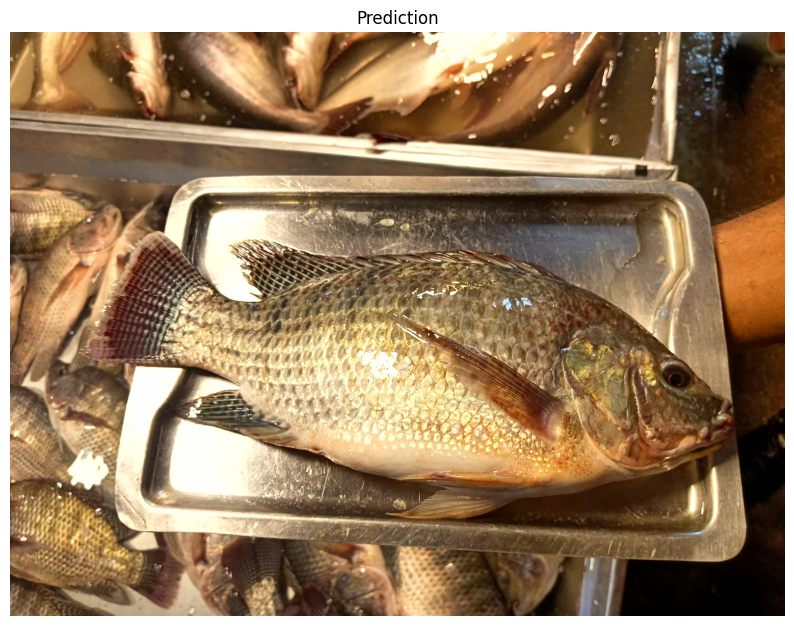

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_img(img_path, boxes=None, labels=None, scores=None, title=None, topk=10):
    img = Image.open(img_path).convert('RGB')
    plt.figure(figsize=(10,8)); plt.imshow(img); ax=plt.gca()
    if boxes is not None:
        for i, box in enumerate(boxes[:topk]):
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='r', linewidth=2)
            ax.add_patch(rect)
            # ✅ label indexing fix
            if labels is not None and labels[i] < len(class_names):
                lbl = class_names[labels[i]]
            else:
                lbl = str(labels[i])
            sc = f"{scores[i]:.2f}" if scores is not None else ""
            ax.text(x1, y1-5, f"{lbl} {sc}", color='yellow', fontsize=12, backgroundcolor="black")
    plt.axis('off'); plt.title(title if title else ""); plt.show()

# sample
img_info = coco['images'][0]
img_path = img_info['file_name']

model.eval()
with torch.no_grad():
    out = model([torchvision.transforms.ToTensor()(Image.open(img_path).convert('RGB')).to(DEVICE)])[0]

# ✅ filter detections by score to reduce too many boxes
keep = out['scores'] > 0.3
boxes = out['boxes'][keep].cpu().numpy()
labels = out['labels'][keep].cpu().numpy()
scores = out['scores'][keep].cpu().numpy()

plot_img(img_path, boxes, labels, scores, title="Prediction")


**Export model / inference helper**

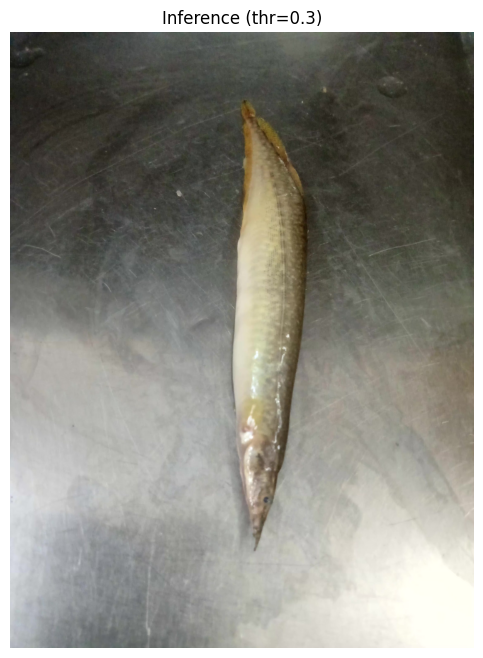

In [17]:
# simple inference function
from torchvision.transforms.functional import to_tensor
def infer_and_draw(image_path, model, score_thr=0.5):
    model.eval()
    img = Image.open(image_path).convert('RGB')
    t = to_tensor(img).to(DEVICE)
    with torch.no_grad():
        out = model([t])[0]
    boxes = out['boxes'].cpu().numpy()
    labels = out['labels'].cpu().numpy()
    scores = out['scores'].cpu().numpy()
    keep = scores >= score_thr
    plot_img(image_path, boxes[keep], labels[keep], scores[keep], title=f"Inference (thr={score_thr})")

# try on a validation image
if len(val_imgs)>0:
    sample_img = val_imgs[0]['file_name']
    infer_and_draw(sample_img, model, score_thr=0.3)


In [18]:
import matplotlib.pyplot as plt


def visualize_detection(path, conf_thresh=0.4):
img = Image.open(path).convert("RGB")
detections = detect_image(path, conf_thresh)
img_np = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


for det in detections:
x1, y1, x2, y2 = map(int, det["bbox"])
cv2.rectangle(img_np, (x1, y1), (x2, y2), (255,0,0), 2)
cv2.putText(img_np, f"{det['label']}:{det['score']:.2f}",
(x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0),2)


plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

IndentationError: expected an indented block after function definition on line 4 (3560583400.py, line 5)

****

In [ ]:
# CELL 15 — Random Prediction Visualization (Fixed)

#COCO_DIR = "/kaggle/working/fish_project/coco"   # <<=== ADD THIS LINE

import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms as T
import os

model.eval()
transform = T.ToTensor()

# validation images folder (FiftyOne COCO export keeps images here)
VAL_IMG_DIR = os.path.join(COCO_OUT, "data")

def show_random_prediction():
    img_name = random.choice(os.listdir(VAL_IMG_DIR))
    img_path = os.path.join(VAL_IMG_DIR, img_name)

    img = Image.open(img_path).convert("RGB")
    x = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(x)[0]

    img_np = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    for box, score, cls in zip(pred['boxes'], pred['scores'], pred['labels']):
        if score < 0.40:
            continue
        x1, y1, x2, y2 = box.int().cpu().numpy()
        cv2.rectangle(img_np, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(
            img_np,
            f"{cls.item()}:{score:.2f}",
            (x1, y1-5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7,
            (0,255,0),
            2
        )

    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

show_random_prediction()


In [ ]:
# CELL 16 — Reusable Inference Function

def detect_image(image_path, conf_thresh=0.40):
    model.eval()
    img = Image.open(image_path).convert("RGB")
    x = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(x)[0]

    results = []
    for box, score, cls in zip(pred['boxes'], pred['scores'], pred['labels']):
        if score >= conf_thresh:
            results.append({
                "bbox": box.cpu().numpy().tolist(),
                "score": float(score),
                "label": int(cls)
            })

    return results

# Test with a random validation image
test_img = os.path.join(VAL_IMG_DIR, random.choice(os.listdir(VAL_IMG_DIR)))
detect_image(test_img)


In [ ]:
# CELL 17 — Visualize Detection using the inference function

def visualize_detection(path, conf_thresh=0.40):
    img = Image.open(path).convert("RGB")
    detections = detect_image(path, conf_thresh)

    img_np = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    for det in detections:
        x1, y1, x2, y2 = map(int, det['bbox'])
        cv2.rectangle(img_np, (x1, y1), (x2, y2), (255,0,0), 2)
        cv2.putText(img_np, f"{det['label']}:{det['score']:.2f}",
                    (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (255,0,0), 2)

    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Run example
visualize_detection(test_img)


In [ ]:
# CELL 18 — Save trained SSL + Faster R-CNN model

SAVE_PATH = "/kaggle/working/fish_frcnn_ssl.pth"
torch.save(model.state_dict(), SAVE_PATH)

print("Model saved at:", SAVE_PATH)
